In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.shape

(30000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content
There are 25 variables:


    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary = credit)
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)

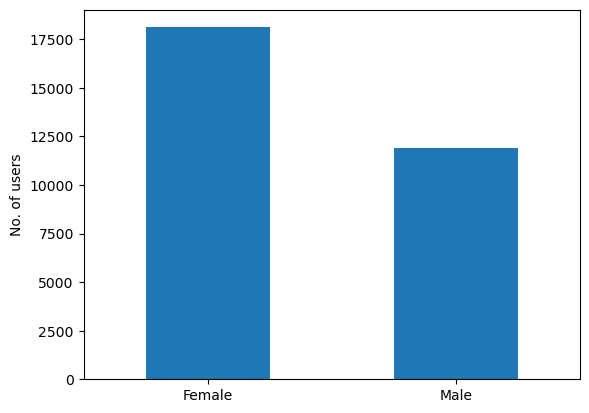

In [7]:
df['SEX'].value_counts().plot(kind='bar')
plt.xticks([0,1],['Female','Male'],rotation=0)
plt.ylabel("No. of users")
plt.show()

* There are more women than men in the dataset.

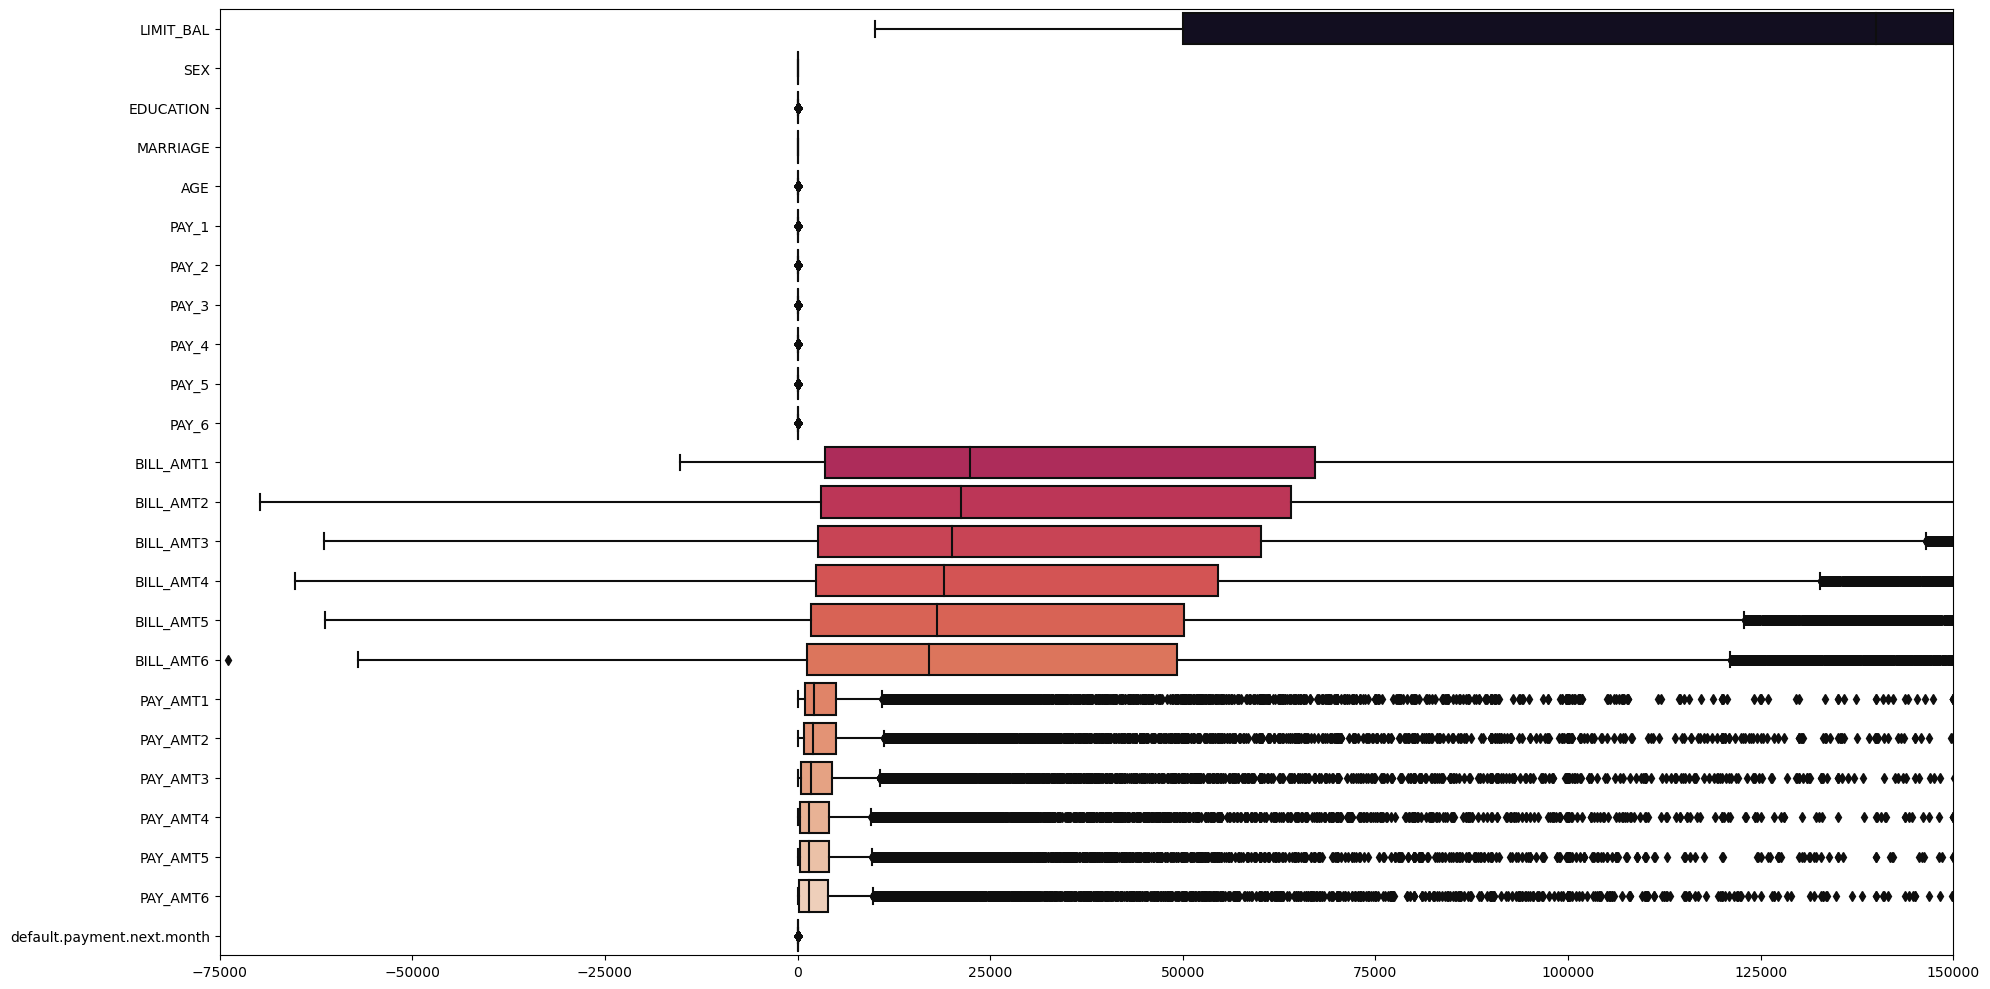

In [145]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,palette='rocket',orient='h')
plt.xlim(-0.075*(10**6),0.15*(10**6))
plt.tight_layout()
plt.show()

# EDUCATION

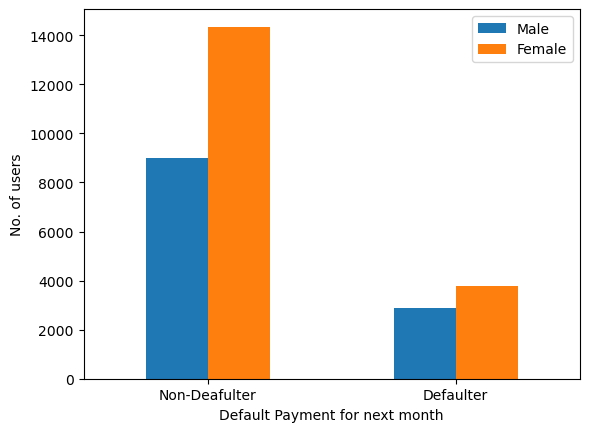

In [126]:
pd.crosstab(df['default.payment.next.month'],df['SEX']).plot(kind='bar')
plt.xticks([0,1],['Non-Deafulter','Defaulter'],rotation=0)
plt.xlabel('Default Payment for next month')
plt.ylabel('No. of users')
plt.legend(['Male','Female'])
plt.show()

* There are more women than men in the dataset and thus no. of default cases in women is more, but same goes of non-default cases.

In [9]:
df['EDUCATION'].replace([0,6],5).value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [10]:
df['EDUCATION'].replace([0,6],5,inplace=True)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [11]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


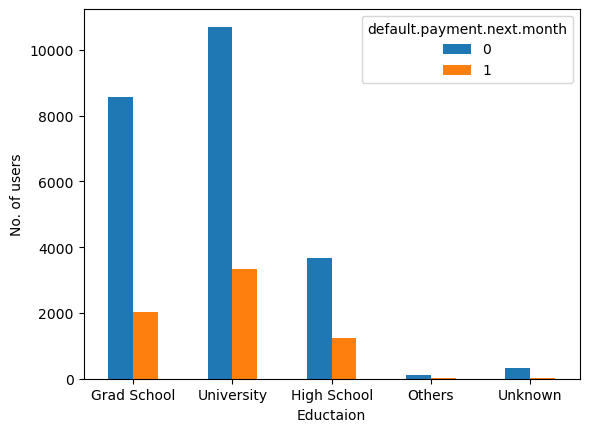

In [12]:
pd.crosstab(df['EDUCATION'],df['default.payment.next.month']).plot(kind='bar')
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'],rotation=0)
plt.xlabel('Eductaion')
plt.ylabel('No. of users')
#plt.legend(['Male','Female'])
plt.show()

In [13]:
df_edu_def = pd.crosstab(df['EDUCATION'],df['default.payment.next.month'])
df_edu_def.reset_index(drop=True)

default.payment.next.month,0,1
0,8549,2036
1,10700,3330
2,3680,1237
3,116,7
4,319,26


In [14]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [15]:
df['default.payment.next.month'].groupby(df['EDUCATION']).value_counts(normalize=True)

EDUCATION  default.payment.next.month
1          0                             0.807652
           1                             0.192348
2          0                             0.762651
           1                             0.237349
3          0                             0.748424
           1                             0.251576
4          0                             0.943089
           1                             0.056911
5          0                             0.924638
           1                             0.075362
Name: default.payment.next.month, dtype: float64

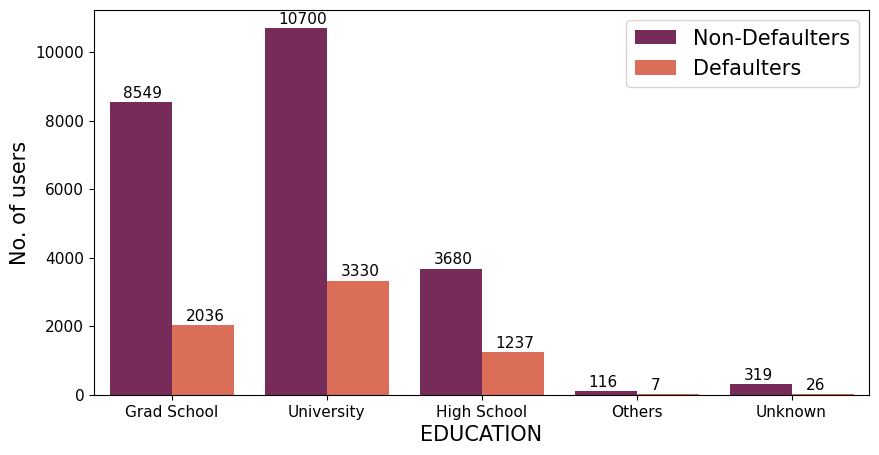

In [16]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df,x='EDUCATION',hue='default.payment.next.month', palette = 'rocket')
plt.xlabel('EDUCATION',fontsize=15)
plt.ylabel('No. of users',fontsize=15)
plt.legend(['Non-Defaulters','Defaulters'],fontsize=15)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)
plt.yticks(fontsize=11)


for p in ax.patches:
    ax.annotate(text=p.get_height(),xy=(p.get_x()+0.09,p.get_height()+130),fontsize=11)
    
plt.show()

In [17]:
df_defaut=df[df['default.payment.next.month']==1]
df_defaut['EDUCATION'].value_counts(normalize=True)

2    0.501808
1    0.306811
3    0.186407
5    0.003918
4    0.001055
Name: EDUCATION, dtype: float64

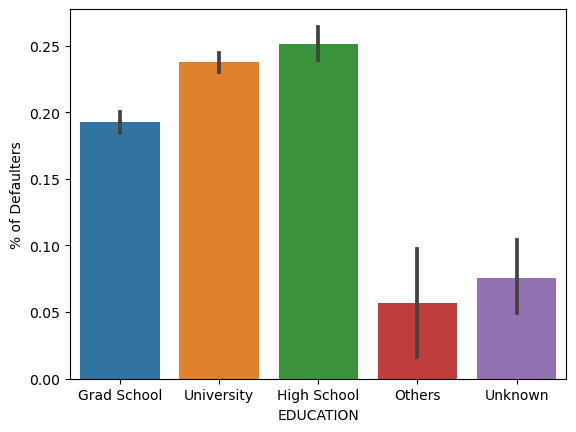

In [18]:
sns.barplot(data=df,x='EDUCATION',y='default.payment.next.month')
plt.ylabel('% of Defaulters')
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'])
plt.show()

* The chances of default are more for High School users, followed by University, Grad School.

# Marriage

In [19]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

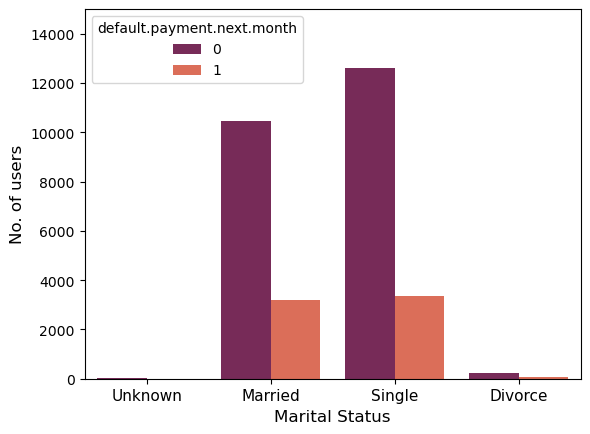

In [20]:
ax = sns.countplot(data = df, x = 'MARRIAGE', hue="default.payment.next.month", palette = 'rocket')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("No. of users", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)
plt.show()

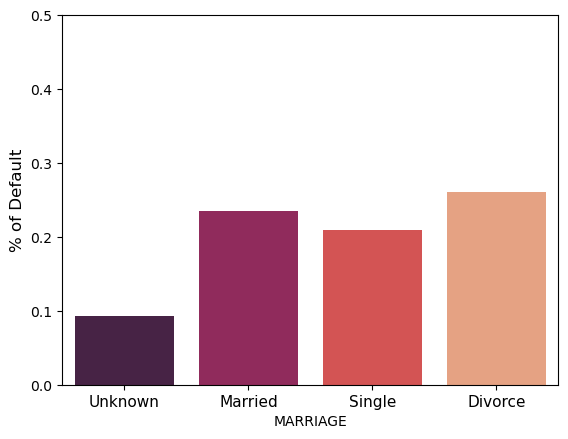

In [21]:
ax = sns.barplot(x = "MARRIAGE", y = "default.payment.next.month", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

plt.show()

* The people who are single have a lower chances of defaulting than the married and divorced ones.

# SEX

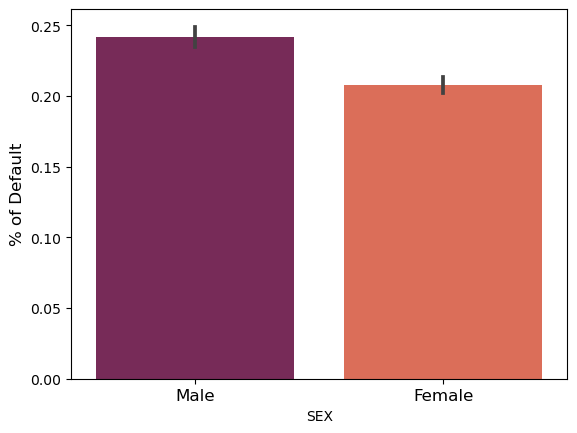

In [147]:
sns.barplot(data=df,x='SEX',y='default.payment.next.month', palette = 'rocket')
plt.ylabel("% of Default", fontsize= 12)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.show()

* There are higher chances of defaulting in male than female.

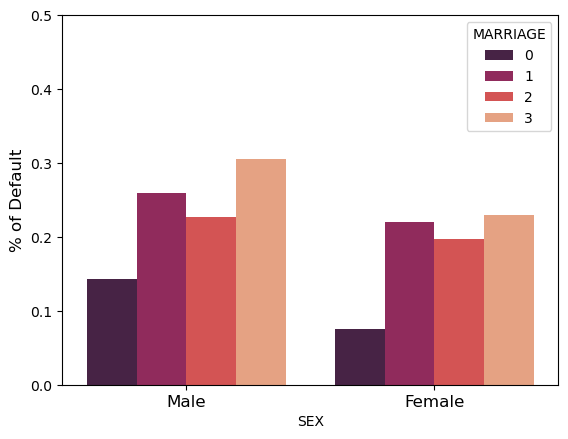

In [22]:
ax = sns.barplot(x = "SEX", y = "default.payment.next.month", hue = "MARRIAGE", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.show()

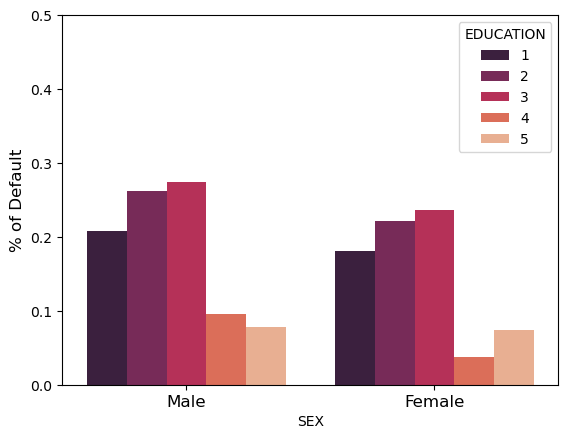

In [148]:
ax = sns.barplot(x = "SEX", y = "default.payment.next.month", hue = "EDUCATION", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.show()

* Males who are in high school have the highest chaces of defaulting.

# AGE

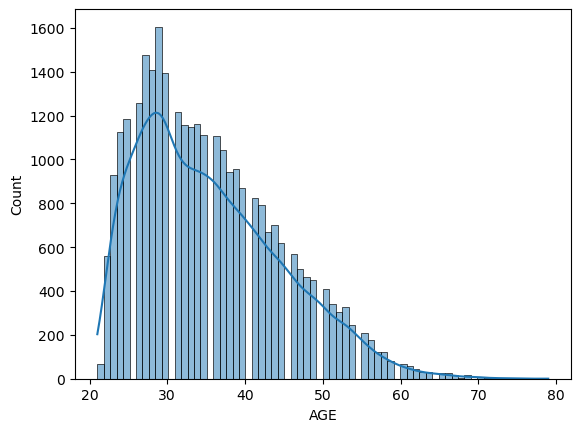

In [23]:
sns.histplot(data=df,x='AGE',kde=True)
plt.show()

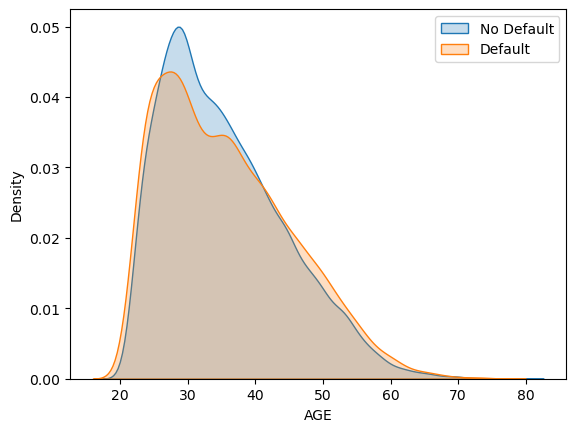

In [24]:
sns.kdeplot(df.loc[(df['default.payment.next.month'] == 0), 'AGE'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['default.payment.next.month'] == 1), 'AGE'], label = 'Default', shade = True)
plt.legend()
plt.show()

In [150]:
df['Age_bins']=pd.cut(df['AGE'],bins=[20,25,30,35,40,45,50,55,60,80])
df['Age_bins'].value_counts()

(25, 30]    7142
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(40, 45]    3605
(45, 50]    2400
(50, 55]    1425
(55, 60]     572
(60, 80]     272
Name: Age_bins, dtype: int64

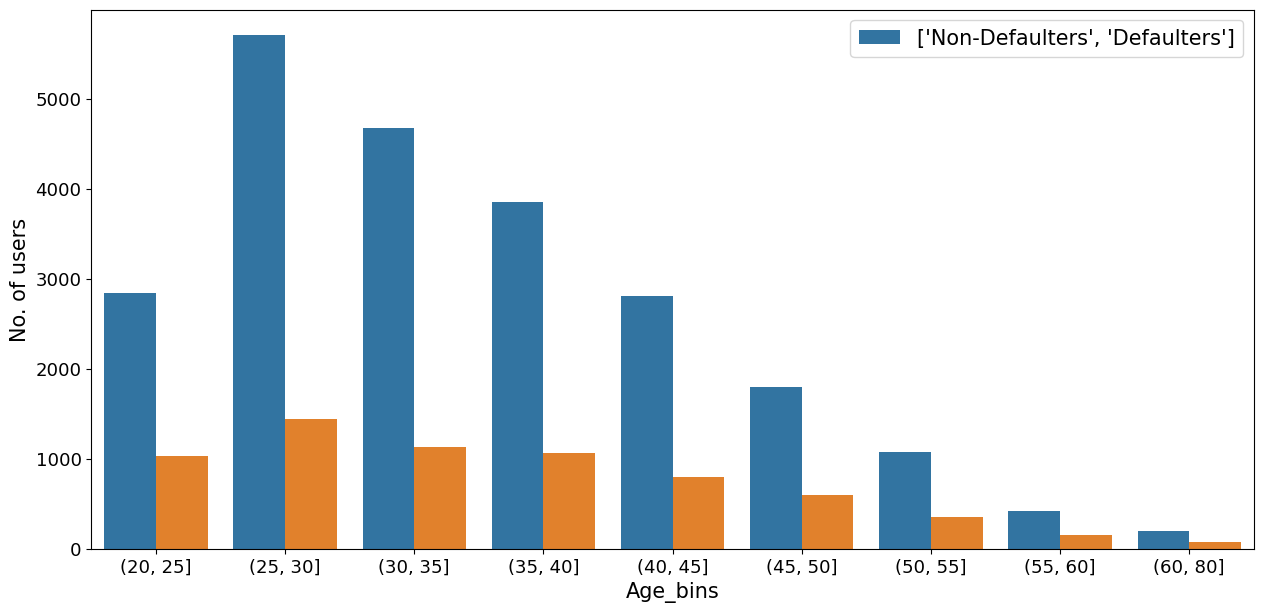

In [151]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='Age_bins',hue='default.payment.next.month')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Age_bins',fontsize=15)
plt.ylabel('No. of users',fontsize=15)
plt.legend([['Non-Defaulters','Defaulters']],fontsize=15)
plt.show()

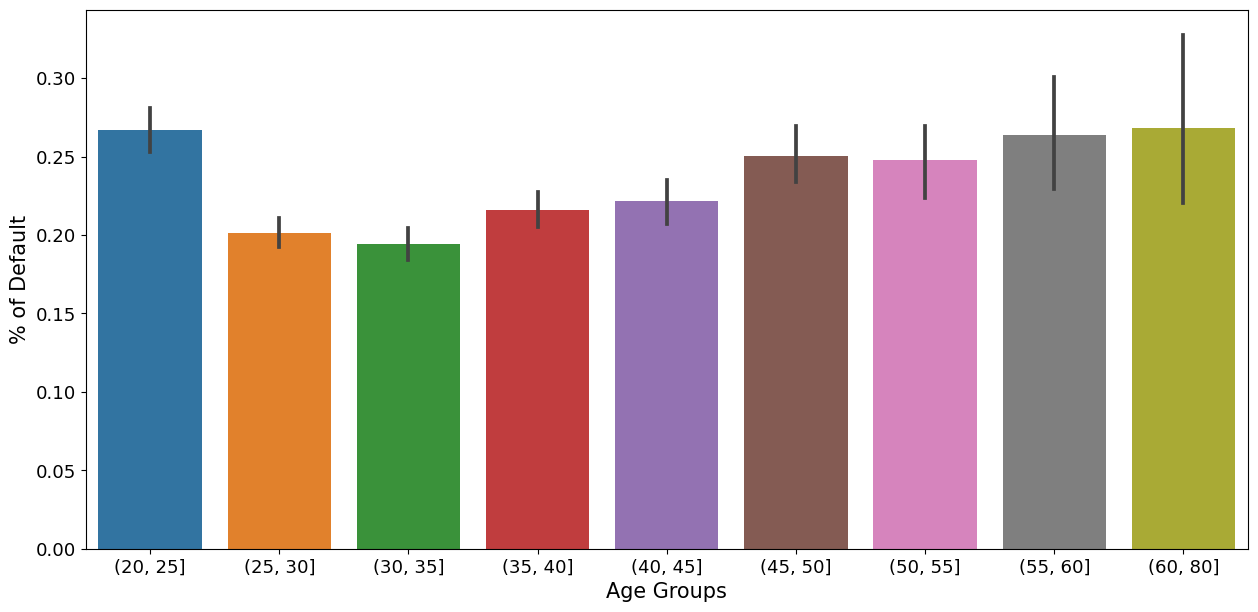

In [152]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='Age_bins',y='default.payment.next.month')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Age Groups',fontsize=15)
plt.ylabel('% of Default',fontsize=15)
plt.show()

* The lowest chances of default are registerd in (35,40] group and highest in (20,25] and (60,80].

# LIMIT_BAL

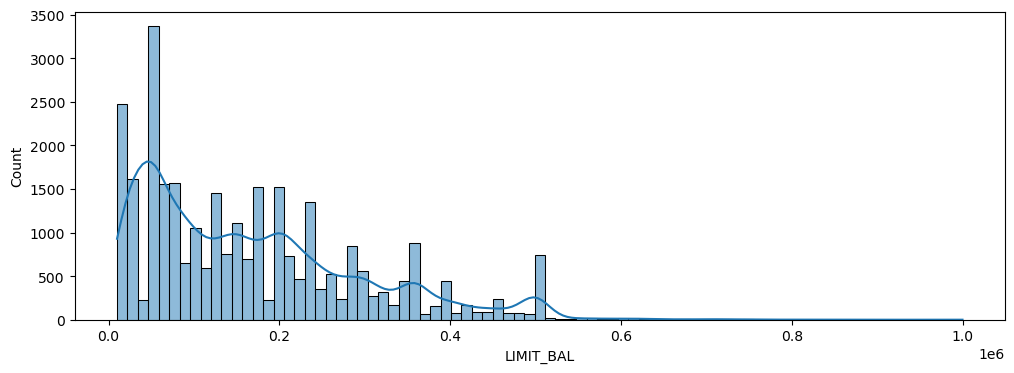

In [27]:
plt.figure(figsize=(12,4))
sns.histplot(df['LIMIT_BAL'],kde=True)
plt.show()

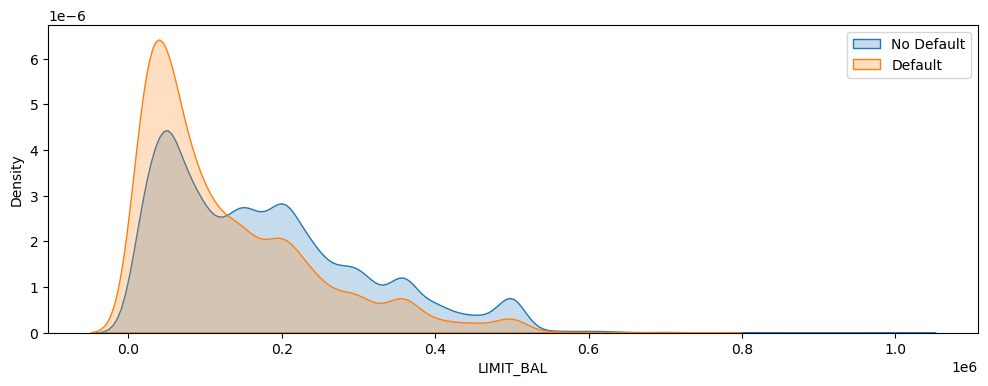

In [28]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['default.payment.next.month'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['default.payment.next.month'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True)
plt.legend()
plt.show()

* Maximum customers has less than or equal to credit limit of 200k

In [29]:
df['LimitBin'] = pd.cut(df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(df['LimitBin'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: LimitBin, dtype: int64


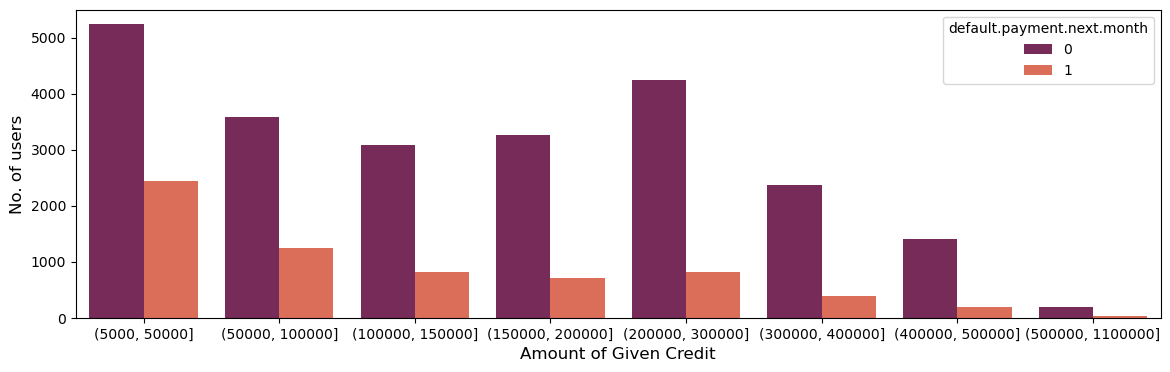

In [30]:
plt.figure(figsize=(14,4))
sns.countplot(data = df, x = 'LimitBin', hue="default.payment.next.month", palette = 'rocket')

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("No. of users", fontsize= 12)
plt.show()

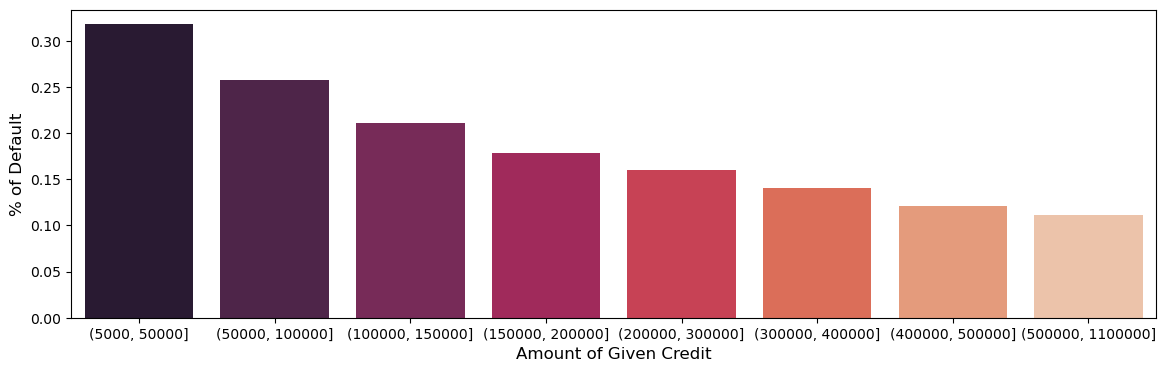

In [31]:
plt.figure(figsize=(14,4))
sns.barplot(x = "LimitBin", y = "default.payment.next.month", data = df, palette = 'rocket', ci = None)
plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.show()

* As the credit limit of a user increases, his/her chances of registering default reduces. Users with credit limit of less than 50k has the chances of 30% for registering default.

# PAY_X

In [32]:
df.rename(columns={'PAY_0':'PAY_1'},inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Age_bins,LimitBin
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(20, 25]","(5000, 50000]"
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(25, 30]","(100000, 150000]"
2,3,90000.0,2,2,2,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(30, 35]","(50000, 100000]"
3,4,50000.0,2,2,1,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(35, 40]","(5000, 50000]"
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"(55, 60]","(5000, 50000]"


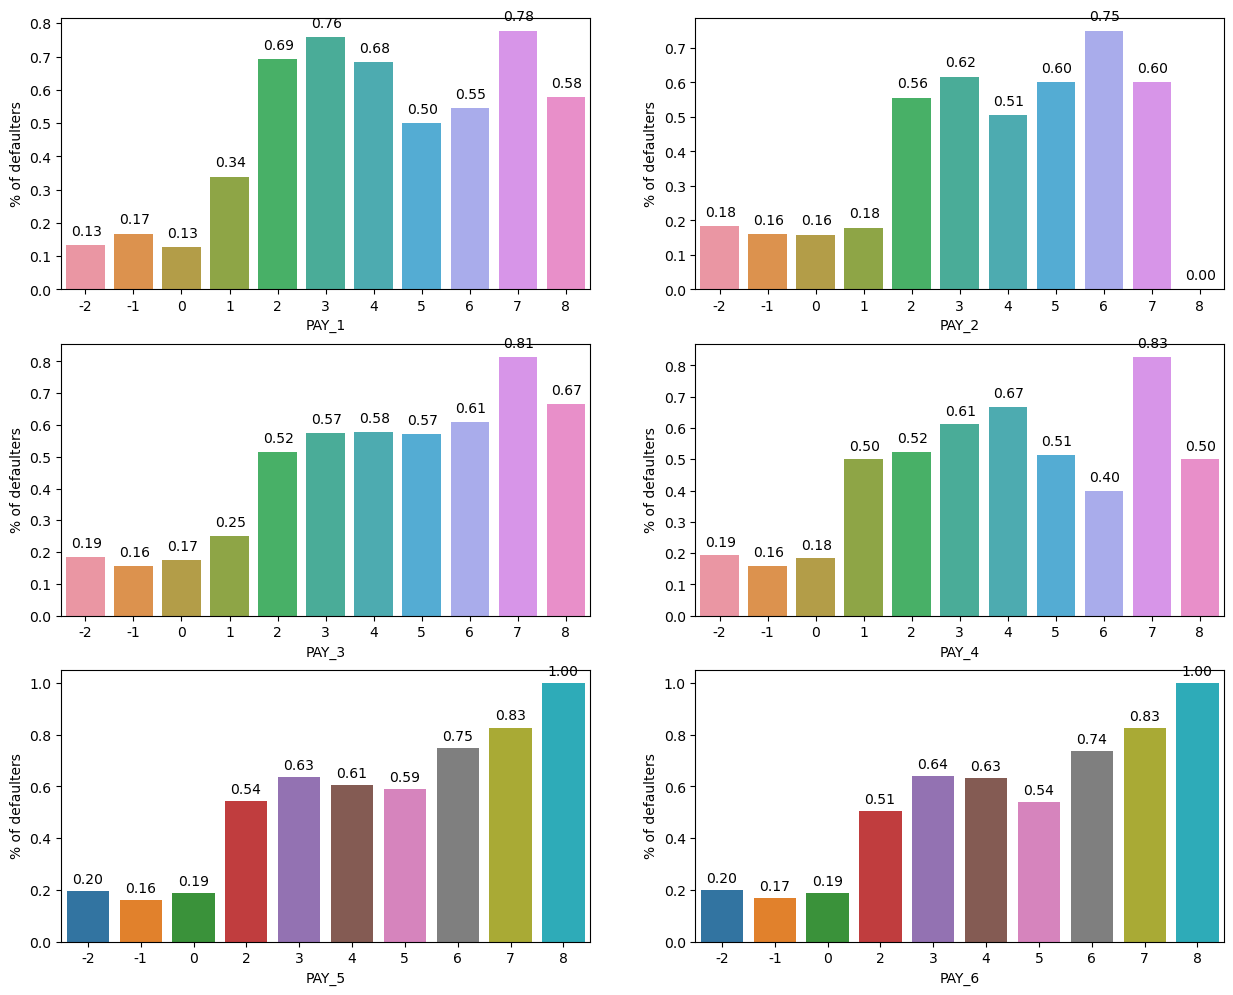

In [33]:
plt.figure(figsize=(15,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data=df,x='PAY_'+str(i+1),y='default.payment.next.month',ci=None)
    plt.ylabel("% of defaulters")
    for p in ax.patches:
        ax.annotate(("%.2f"%p.get_height()),(p.get_x()+0.1,p.get_height()+0.03),fontsize=10)
plt.show()

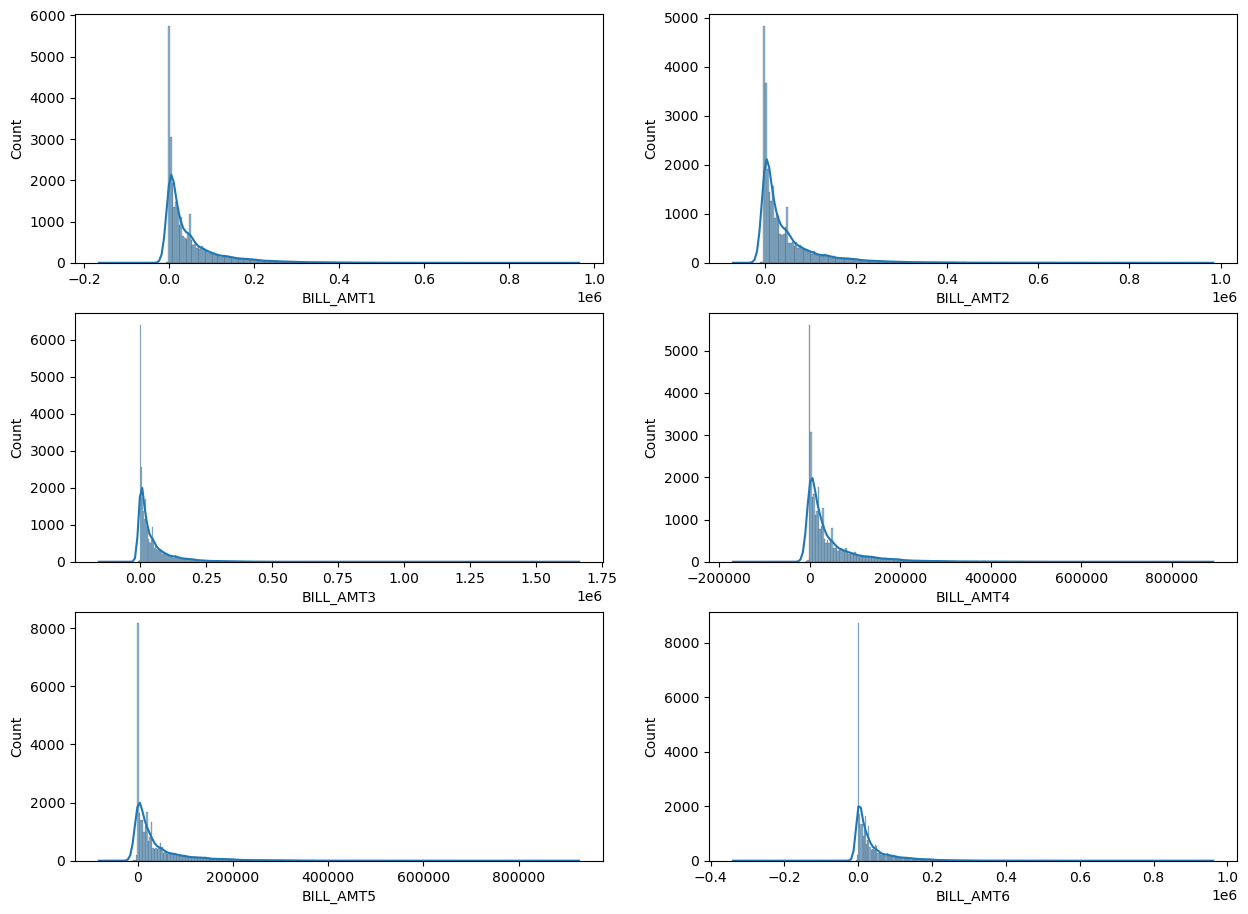

In [40]:
plt.figure(figsize=(15,11))
for i in range(6):
    plt.subplot(3,2,i+1)
    ax = sns.histplot(data=df,x='BILL_AMT'+str(i+1),kde=True)
plt.show()

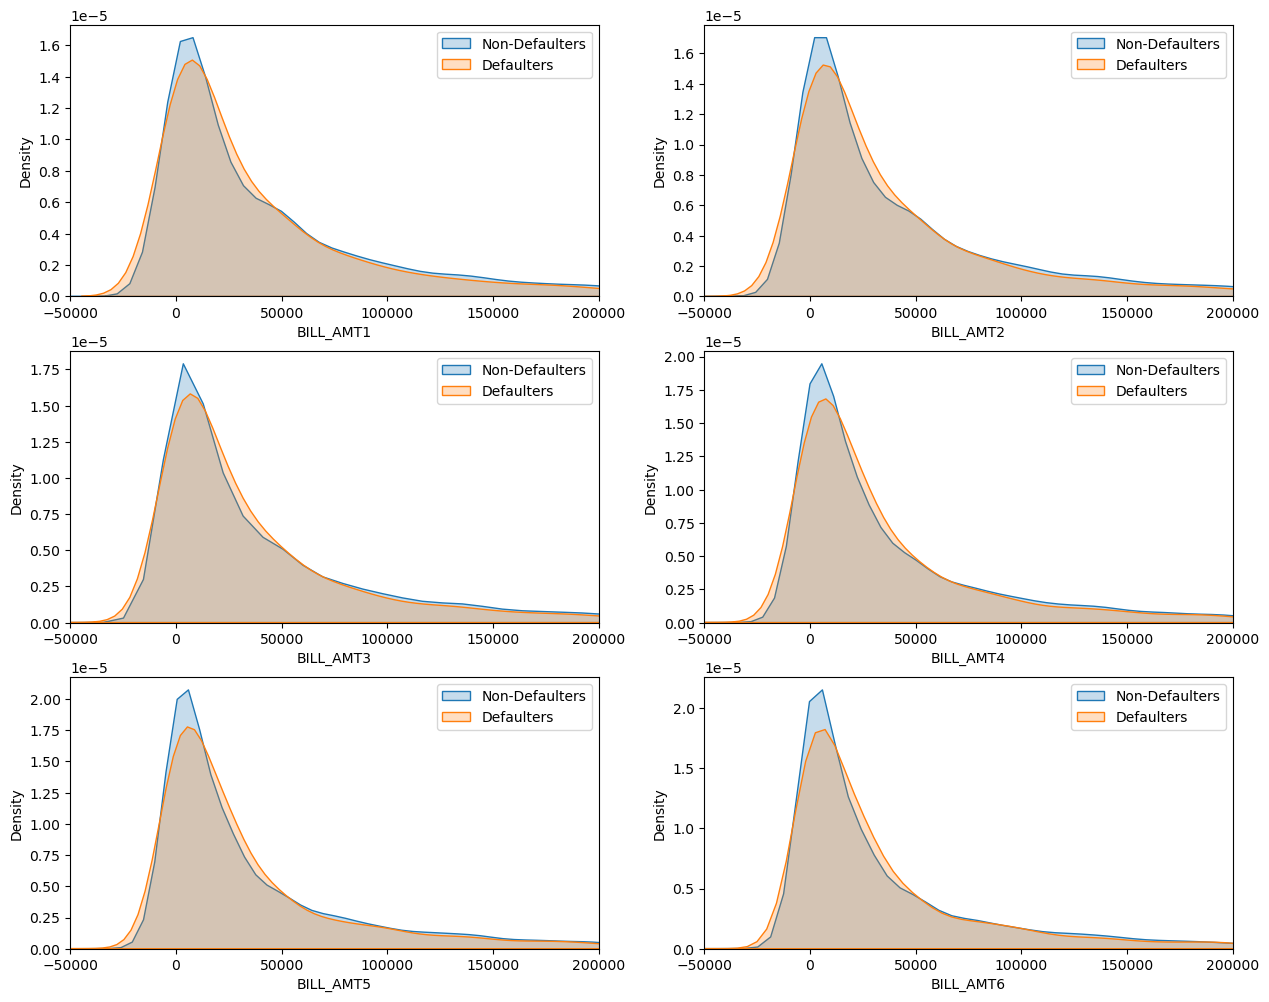

In [47]:
plt.figure(figsize=(15,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    sns.kdeplot(data=df[df['default.payment.next.month']==0],x='BILL_AMT'+str(i+1),shade=True)
    sns.kdeplot(data=df[df['default.payment.next.month']==1],x='BILL_AMT'+str(i+1),shade=True)
    plt.xlim(-50000,200000)
    plt.legend(['Non-Defaulters','Defaulters'])
plt.show()

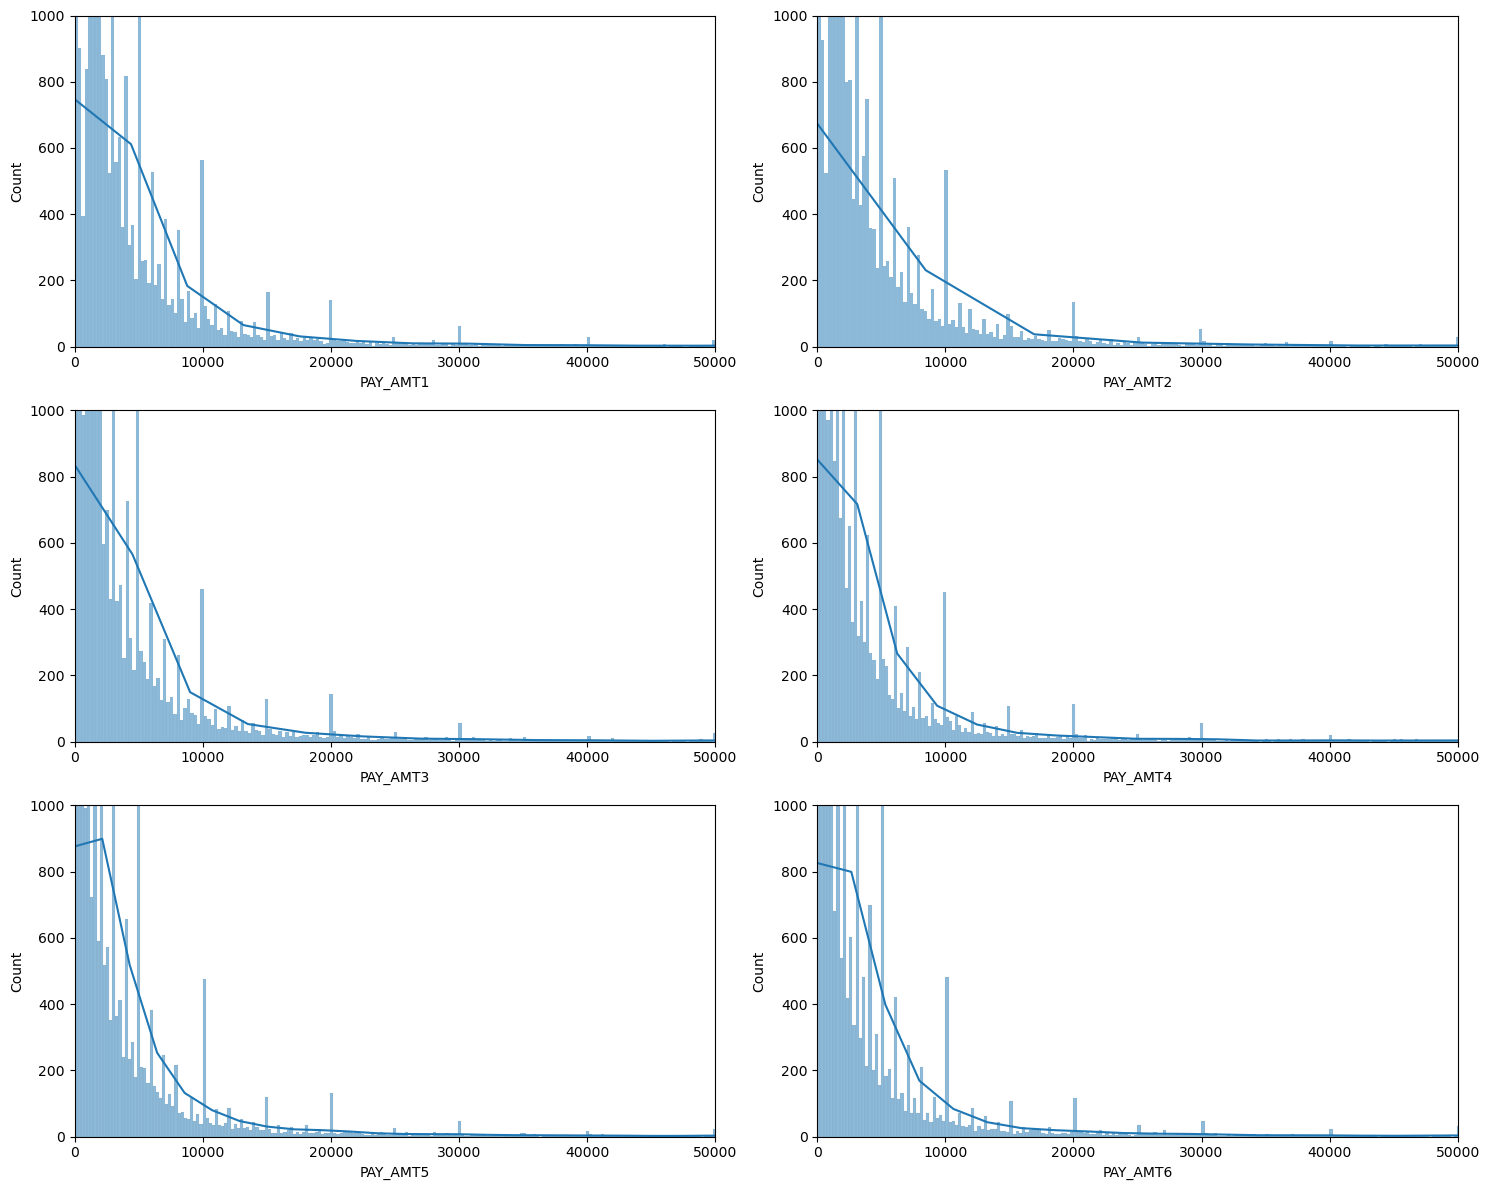

In [54]:
plt.figure(figsize=(15,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    ax = sns.histplot(data=df,x='PAY_AMT'+str(i+1),kde=True)
    plt.ylim(0,1000)
    plt.xlim(0,50000)
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation
    plt.tight_layout()
plt.show()

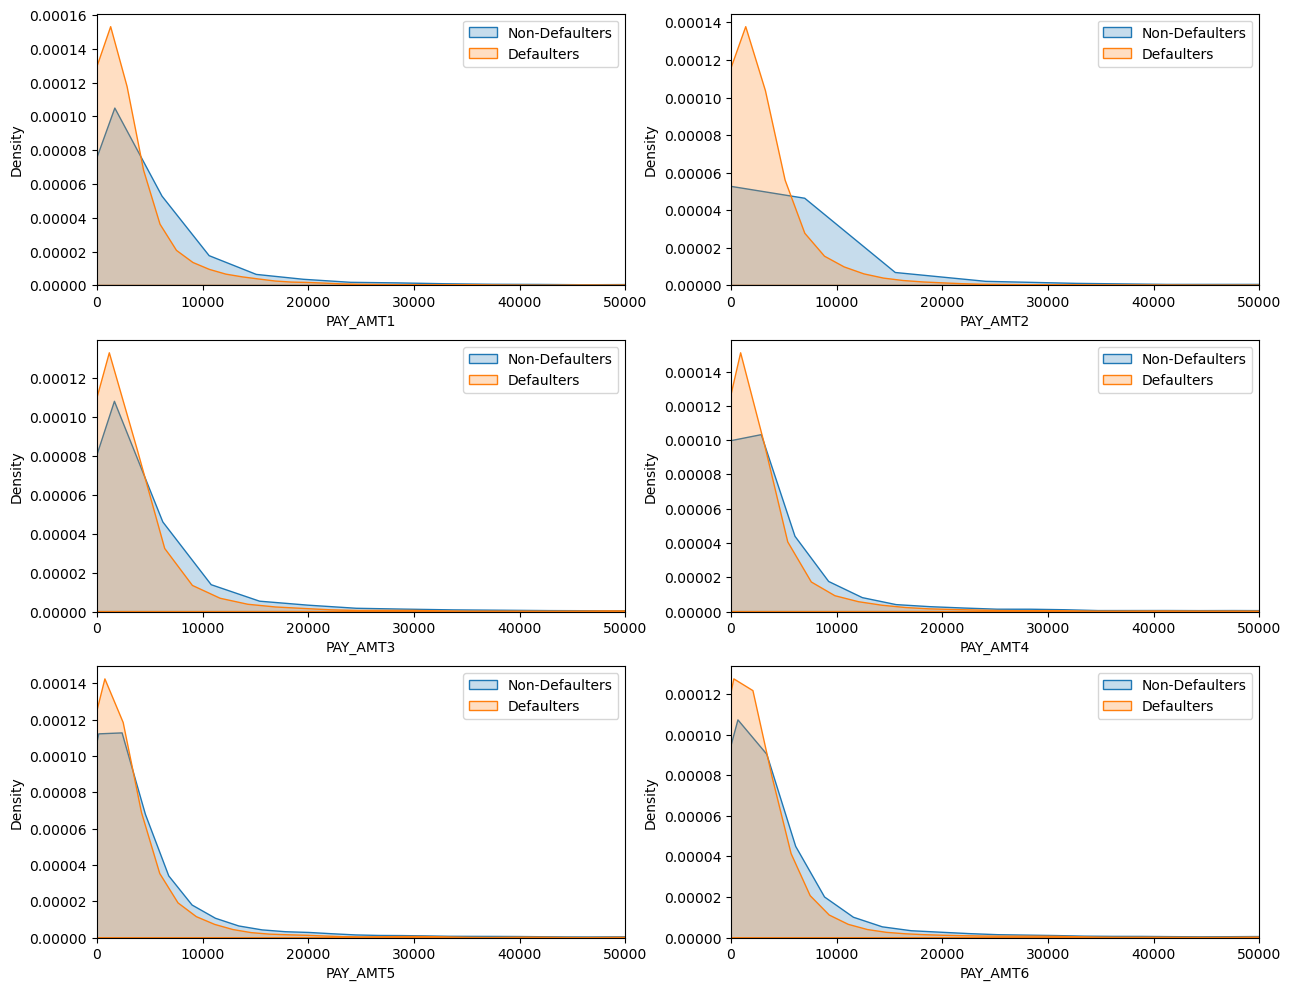

In [57]:
plt.figure(figsize=(15,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    sns.kdeplot(data=df[df['default.payment.next.month']==0],x='PAY_AMT'+str(i+1),shade=True)
    sns.kdeplot(data=df[df['default.payment.next.month']==1],x='PAY_AMT'+str(i+1),shade=True)
#     plt.ylim(0,1000)
    plt.xlim(0,50000)
    plt.legend(['Non-Defaulters','Defaulters'])
plt.show()

# Training the model

In [59]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Age_bins,LimitBin
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(20, 25]","(5000, 50000]"
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(25, 30]","(100000, 150000]"
2,3,90000.0,2,2,2,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(30, 35]","(50000, 100000]"
3,4,50000.0,2,2,1,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(35, 40]","(5000, 50000]"
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"(55, 60]","(5000, 50000]"


In [61]:
df.drop(['ID','Age_bins','LimitBin'],axis=1,inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [110]:
df_sample = df.iloc[:1000,:]
df_sample.shape

(1000, 24)

In [111]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   1000 non-null   float64
 1   SEX                         1000 non-null   int64  
 2   EDUCATION                   1000 non-null   int64  
 3   MARRIAGE                    1000 non-null   int64  
 4   AGE                         1000 non-null   int64  
 5   PAY_1                       1000 non-null   int64  
 6   PAY_2                       1000 non-null   int64  
 7   PAY_3                       1000 non-null   int64  
 8   PAY_4                       1000 non-null   int64  
 9   PAY_5                       1000 non-null   int64  
 10  PAY_6                       1000 non-null   int64  
 11  BILL_AMT1                   1000 non-null   float64
 12  BILL_AMT2                   1000 non-null   float64
 13  BILL_AMT3                   1000 n

In [112]:
x = df_sample.iloc[:,:-1]
y = (df_sample.iloc[:,-1]).to_frame()

In [113]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [114]:
y.head()

,default.payment.next.month
0,1
1,1
2,0
3,0
4,0


In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((750, 23), (250, 23), (750, 1), (250, 1))

In [116]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X=x_train)
x_test_scaled = scaler.transform(X=x_test)

In [117]:
random = RandomForestClassifier()
gradient = GradientBoostingClassifier()

In [118]:
random.fit(x_train_scaled,y_train)
gradient.fit(x_train_scaled,y_train)

GradientBoostingClassifier()

In [119]:
y_pred_rand = random.predict(x_test_scaled)
y_pred_grad = gradient.predict(x_test_scaled)

In [122]:
score_rand = accuracy_score(y_test,y_pred_rand)
score_grad = accuracy_score(y_test,y_pred_grad)
print(f"The accuracy of random forest is {(score_rand)*100}%. \nThe accuracy of the gradient boosting is {score_grad*100}%")

The accuracy of random forest is 80.0%. 
The accuracy of the gradient boosting is 81.2%


In [124]:
print(classification_report(y_test,y_pred_rand))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       202
           1       0.44      0.17      0.24        48

    accuracy                           0.80       250
   macro avg       0.64      0.56      0.56       250
weighted avg       0.75      0.80      0.76       250



In [125]:
print(classification_report(y_test,y_pred_grad))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       202
           1       0.52      0.27      0.36        48

    accuracy                           0.81       250
   macro avg       0.68      0.61      0.62       250
weighted avg       0.78      0.81      0.79       250

